In [1]:
import numpy as np
import matplotlib.pyplot as plot
import math
import cv2

In [2]:
def MOD_256_QAM(m) :

  A_Even_Bit = []
  A_Odd_Bit = []

  for i in range((len(m))) :
    if i % 2 == 0 :
      A_Odd_Bit.extend([m[i]])
    else :
      A_Even_Bit.extend([m[i]])

  #print(A_Odd_Bit,"odd")
  #print(A_Even_Bit,"Even")

  #print(A_Even_Bit,'E')
  #print(A_Odd_Bit,'O')

  Non_Bi_Even=[]
  Non_Bi_Odd=[]
  sum1=0
  sum2=0
  for i in range(0,len(A_Even_Bit),4) :
    sum1=0
    sum2=0
    for j in range(4) :
      sum1=sum1+(2**(3-j))*A_Even_Bit[i+j]
      sum2=sum2+(2**(3-j))*A_Odd_Bit[i+j]
    Non_Bi_Even.append(sum1)
    Non_Bi_Odd.append(sum2)

  #print(Non_Bi_Even,'E')
  #print(Non_Bi_Odd,'O')

  B_Even_Bit = 2 * np.array(Non_Bi_Even) - 15
  B_Odd_Bit = 2 * np.array(Non_Bi_Odd) - 15

  #print(B_Even_Bit,'E')
  #print(B_Odd_Bit,'O')
  
  e_e = []
  e_o = []
  for i in range(len(B_Even_Bit)) :
    e_e.extend([B_Even_Bit[i]]*100)
    e_o.extend([B_Odd_Bit[i]]*100)
  #plot.plot(e_e)
  #plot.show()
  #plot.plot(e_o)
  #plot.show()
  #print(e_e,'E')
  #print(e_o,'O')

  t = np.arange(0,len(e_e)*(1/((100/2.1)*21)),1/((100/2.1)*21))      #1 bits have 2.1 period because Rb=1000*10**6 and fequency=2100*10**6  
  t1= np.arange(0,len(B_Even_Bit)*(10**-9),(10**-9)/100)
  sin = np.sin(2*np.pi*(84)*t) 
  cos = np.cos(2*np.pi*(84)*t) 
  I_t = np.array(sin*e_e)
  Q_t = cos*np.array(e_o)
  #plot.plot(I_t)
  #plot.show()
  #plot.plot(Q_t)
  #plot.show()
  
  QAM=I_t+Q_t

  return QAM


  

In [3]:
def De_256_QAM(m) :

  ZI = []
  ZQ = []
  t = np.arange(0,len(m)*(1/((100/2.1)*21)),1/((100/2.1)*21))      #1 bits have 2.1 period because Rb=1000*10**6 and fequency=2100*10**6  
  #t1= np.arange(0,len(m)*(10**-9),(10**-9))
  sin = np.sin(2*np.pi*(84)*t) 
  cos = np.cos(2*np.pi*(84)*t) 
  I1 = m*sin
  Q1 = m*cos
  sumi=0
  sumq=0
  for i in range(0,len(m),100)  :
    sumi=0
    sumq=0
    for j in range(100) :
      sumi=sumi+I1[i+j]
      sumq=sumq+Q1[i+j]
    sumi=sumi*10**-2
    sumq=sumq*10**-2
    ZI.append(sumi)
    ZQ.append(sumq)

  ZI=np.array(ZI)*2
  ZQ=np.array(ZQ)*2

  I=[]
  Q=[]
  for i in range(len(ZI)) :
    if ZI[i]>=14 :
      I.append(15)

    if ZQ[i]>=14 :
      Q.append(15)

    for j in range(14,-14,-2) :
      if ZI[i]<j and ZI[i]>=j-2 :
        I.append(j-1)
    
    for j in range(14,-14,-2) :
      if ZQ[i]<j and ZQ[i]>=j-2 :
        Q.append(j-1)

    if ZI[i]<-14 :
        I.append(-15)

    if ZQ[i]<-14 :
        Q.append(-15)

  I_Bit = []
  Q_Bit = []

  I=np.array(I)
  Q=np.array(Q)
  I=(I+15)/2
  Q=(Q+15)/2

  for i in range(len(I)) :
    if I[i] == 15 :
      I_Bit.extend([1,1,1,1])
    elif I[i] == 14 :
      I_Bit.extend([1,1,1,0])
    elif I[i] == 13 :
      I_Bit.extend([1,1,0,1])
    elif I[i] == 12 :
      I_Bit.extend([1,1,0,0])
    elif I[i] == 11 :
      I_Bit.extend([1,0,1,1])
    elif I[i] == 10 :
      I_Bit.extend([1,0,1,0])
    elif I[i] == 9 :
      I_Bit.extend([1,0,0,1])
    elif I[i] == 8 :
      I_Bit.extend([1,0,0,0])
    elif I[i] == 7 :
      I_Bit.extend([0,1,1,1])
    elif I[i] == 6 :
      I_Bit.extend([0,1,1,0])
    elif I[i] == 5 :
      I_Bit.extend([0,1,0,1])
    elif I[i] == 4 :
      I_Bit.extend([0,1,0,0])
    elif I[i] == 3 :
      I_Bit.extend([0,0,1,1])
    elif I[i] == 2 :
      I_Bit.extend([0,0,1,0])
    elif I[i] == 1 :
      I_Bit.extend([0,0,0,1])
    elif I[i] == 0 :
      I_Bit.extend([0,0,0,0])

    if Q[i] == 15 :
      Q_Bit.extend([1,1,1,1])
    elif Q[i] == 14 :
      Q_Bit.extend([1,1,1,0])
    elif Q[i] == 13 :
      Q_Bit.extend([1,1,0,1])
    elif Q[i] == 12 :
      Q_Bit.extend([1,1,0,0])
    elif Q[i] == 11 :
      Q_Bit.extend([1,0,1,1])
    elif Q[i] == 10 :
      Q_Bit.extend([1,0,1,0])
    elif Q[i] == 9 :
      Q_Bit.extend([1,0,0,1])
    elif Q[i] == 8 :
      Q_Bit.extend([1,0,0,0])
    elif Q[i] == 7 :
      Q_Bit.extend([0,1,1,1])
    elif Q[i] == 6 :
      Q_Bit.extend([0,1,1,0])
    elif Q[i] == 5 :
      Q_Bit.extend([0,1,0,1])
    elif Q[i] == 4 :
      Q_Bit.extend([0,1,0,0])
    elif Q[i] == 3 :
      Q_Bit.extend([0,0,1,1])
    elif Q[i] == 2 :
      Q_Bit.extend([0,0,1,0])
    elif Q[i] == 1 :
      Q_Bit.extend([0,0,0,1])
    elif Q[i] == 0 :
      Q_Bit.extend([0,0,0,0])

  I_Bit=np.array(I_Bit)
  Q_Bit=np.array(Q_Bit)

  x=[]
  for i in range(len(Q_Bit)) :
    x.append(Q_Bit[i])
    x.append(I_Bit[i])

  x=np.array(x)
  return x




      

    
      

In [4]:
def importandplotphoto(p) :
  x = cv2.imread(p)
  y = x.shape
  z = x.reshape(1,y[0]*y[1]*y[2])
  #plot.imshow(x[:,:,::-1])
  #plot.title('Photo before transmitted')
  #plot.show()

  c = z[0]
  c1=[]
  p = str(1)
  for i in range(len(c)) :
    p = format(c[i],'08b')
    for j in range(8) :
      c1.append(int(p[j]))


  return c1,y,x


In [5]:
def hexbinarytoten(m) :
  x_bar2 =[]
  sum3=0
  for i in range(0,len(m),8) :
    sum3 = 0
    for j in range(0,8) :
      sum3 = sum3 + m[i+j]*2**(7-j)
    x_bar2.append(sum3)
  x_bar2 = np.array(x_bar2)
  return x_bar2


In [6]:
def comparebit(x,y) :
  sum = 0
  for i in range(len(x)) :
    if x[i] != y[i] :
      sum += 1

  BER = sum/len(x)
  print('ERROR BITS = ',sum)
  print('ALL BITS = ',len(x))
  print('BER = ',BER)
  return BER

In [7]:
def Cross_XOR(x,y) :
  z = x.dot(y)
  for i in range(len(z)) :
    if z[i] % 2 == 0 :
      z[i] = 0
    else :
      z[i] = 1
  return z


In [8]:
def Matrix_P() :
  p = []
  l= []
  for i in range(1,32) :
    if (i != 1) and (i != 2) and (i != 4) and (i != 8) and (i != 16) and (i != 32)  :
      l = format(i,'06b')
      p.extend([np.array([int(l[0]),int(l[1]),int(l[2]),int(l[3]),int(l[4]),int(l[5]),])])
  P = np.array(p)
  return P

In [9]:
def Matrix_G_H(x) :
  I_26 = np.eye(26)
  G = np.append([x],[I_26],axis = 2)
  G = G[0]

  I_6 = np.eye(6)
  H = np.append([I_6],[x.T],axis = 2)
  H = H[0]
  return G,H

In [10]:
P = Matrix_P()
G,H = Matrix_G_H(P)


In [11]:
def Separate_bit(x) :
  m1 = []
  m_separate = []
  m_0 = x
  divi = len(x)%26
  for i in range((26-divi)) :
    m_0.append(0) 
  for i in range(0,len(m_0),26) :
    m1 = []
    for j in range(26) :
      m1.append(m_0[i+j])
    m_separate.append(np.array(m1))
  m_separate = np.array(m_separate)
  return m_separate

In [12]:
def Matrix_C_t(x,y) :
  c_t = []
  for i in range(len(x)) :
    c_t.append(Cross_XOR(x[i],y))
  c_t = np.array(c_t)
  return c_t

In [13]:
def Separate_Matrix_C_t(x) :
  c_t1 = []
  for i in range(len(x)) :
    for j in range(len(x[0])) :
      c_t1.append(x[i][j])
  c_t1 = np.array(c_t1)
  return c_t1

In [14]:
def Matrix_C(x) :
  c = []
  c_1 = []
  for i in range(0,len(x),32) :
    c_1 = []
    for j in range(32) :
      c_1.append(x[j+i])
    c.append(np.array(c_1))
  c = np.array(c)
  return c

In [15]:
def Matrix_e(x) :
  e = np.eye(32)
  s = []
  for i in range(len(e)) :
    s.append(Cross_XOR(e[i],x.T))
  s = np.array(s)
  return e,s


In [16]:
def Matrix_S_c(x,y) :
  s_c = []
  for i in range(len(x)) :
    s_c.append(Cross_XOR(x[i],y.T))
  s_c = np.array((s_c))
  return s_c


In [17]:
def Matrix_C_bar(w,x,y,z) :
  c_bar = w
  for i in range(len(x)) :
    for j in range(len(y)) :
      if list(x[i]) == list(y[j]) :
        for k in range(len(z[0])) :
          if z[j][k] == 1 :
            if c_bar[i][k] == 1 :
              c_bar[i][k] = 0
            else :
              c_bar[i][k] = 1
  return c_bar

In [18]:
def Matrix_C_bar_to_bit(x,y,z) :
  m_hat1 = []
  for i in range(0,len(x)) :
      for j in range(6,32) :
        m_hat1.append(x[i][j])

  #m_hat2 = []
  #for i in range(len(y)) :
  #  m_hat2.append(int(m_hat1[i]))
  #m_hat2 = np.array(m_hat2)

  m_hat = []
  for i in range(len(y)-(26-z)) :
    m_hat.append(m_hat1[i])
  m_hat = np.array(m_hat)
  return m_hat

In [19]:
def White_noise(x,y) :
 np.random.seed(1)
 white_noise = np.random.normal(0,math.sqrt((1/2)*10**(-y/10)),len(x))
 m=x+white_noise
 return m

SNR =  -50


KeyboardInterrupt: ignored

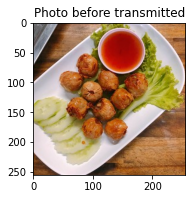

In [23]:
SNR = np.arange(-50,20,5)
BER = []
for o in SNR :
  print("SNR = ",o)
  binaryphoto,y,photo = importandplotphoto('C:\Users\ballz\Desktop\coding\4G\แหนม.jpg') #ใส่รูปที่ต้องการส่ง

  plot.subplot(1, 2, 1)
  plot.title('Photo before transmitted')
  plot.imshow(photo[:,:,::-1])

  P = Matrix_P()

  G,H = Matrix_G_H(P)
  m = binaryphoto
  divi = len(m)%26

  m_separate = Separate_bit(m)

  c_t = Matrix_C_t(m_separate,G)

  c_t1 = Separate_Matrix_C_t(c_t)

  QAM =  MOD_256_QAM(c_t1)
  pluswhite = White_noise(QAM,o)
  c_r = De_256_QAM(pluswhite)

  c = Matrix_C(c_r)

  e,s = Matrix_e(H)

  s_c = Matrix_S_c(c,H)

  c_bar = Matrix_C_bar(c,s_c,s,e)

  m_hat = Matrix_C_bar_to_bit(c_bar,m,divi)

  m_hat1 = hexbinarytoten(m_hat)

  m1 = m_hat1.reshape(y[0],y[1],y[2])
  plot.subplot(1, 2, 2)
  plot.imshow(m1[:,:,::-1])
  plot.title('Photo after transmitted')
  plot.show()

  fig, axes = plot.subplots(1,2, figsize = (12,4))
  t1= np.arange(0,len(QAM)*4*(10**-2),4*(10**-2))
  axes[0].plot(t1[0:1000],QAM[0:1000])
  axes[0].set_title('256 - QAM signal before transmitted form 0 to 4*10**-8 sec ')
  axes[0].set_xlabel('Time (nanosec)')
  axes[0].set_ylabel('Amplitude')

  axes[1].plot(t1[0:1000],pluswhite[0:1000])
  axes[1].set_xlabel('Time (nanosec)')
  axes[1].set_ylabel('Amplitude')
  axes[1].set_title('256 - QAM signal after transmitted form to 4*10**-8 sec')
  plot.show()

  ber = comparebit(m_hat,binaryphoto)
  BER.append(ber)

BER = np.array(BER)
plot.title('waterfall curve')
plot.xlabel('SNR')
plot.ylabel('BER')
plot.semilogy(SNR,BER)
plot.show()